In [105]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# import file
with open("tomato_cropping_data.json", "r", encoding="utf-8") as f:
    raw_data = json.load(f)

# Expanding userId + croppingData inside field to one row
records = []
for farm in raw_data:
    user_id = farm.get("userId")
    for crop in farm.get("croppingData", []):
        record = {
            "userId": user_id,
            **crop  # bring crop dict keys
        }
        records.append(record)

df = pd.DataFrame(records)


### 577개 토마토 농가 (2016~2024) metadata

In [123]:
df.dtypes

userId                     object
croppingSerlNo              int64
statusCode                 object
statusMessage              object
itemCode                   object
sampleNum                  object
measDate           datetime64[ns]
growLength                float64
flowerTop                 float64
stemDiameter              float64
leavesLength              float64
leavesWidth               float64
leavesNum                 float64
flowerPosition            float64
fruitsPosition            float64
fruitsNum                 float64
harvestPosition           float64
ped                       float64
solarCorrection           float64
fruitsWeight              float64
week                       UInt32
year                       UInt32
dtype: object

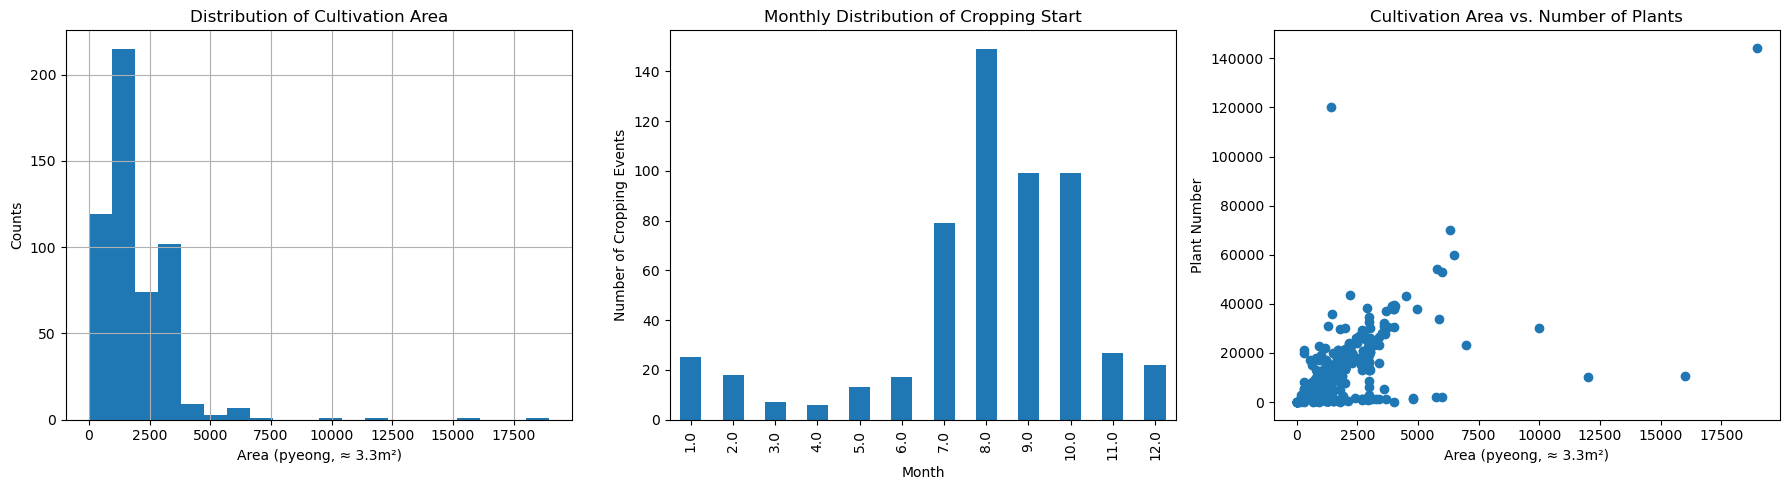

In [107]:
df["croppingDate"] = pd.to_datetime(df["croppingDate"], errors="coerce")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Cultivation Area Histogram
df["cultivationArea"].hist(bins=20, ax=axes[0])
axes[0].set_title("Distribution of Cultivation Area")
axes[0].set_xlabel("Area (pyeong, ≈ 3.3m²)")
axes[0].set_ylabel("Counts")

# 2. Cropping Start Month
df["croppingDate"].dt.month.value_counts().sort_index().plot(kind="bar", ax=axes[1])
axes[1].set_title("Monthly Distribution of Cropping Start")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Cropping Events")

# 3. Area vs. Plant Number
axes[2].scatter(df["cultivationArea"], df["plantNum"])
axes[2].set_title("Cultivation Area vs. Number of Plants")
axes[2].set_xlabel("Area (pyeong, ≈ 3.3m²)")
axes[2].set_ylabel("Plant Number")

plt.tight_layout()
plt.show()

### 생육데이터 확인 (tomato_cultivate_data_valid)

In [130]:
# PF_0020745_01

with open("tomato_cultivate_data_valid.json", "r", encoding="utf-8") as f:
    raw_data = json.load(f)

# 평탄화
records = []
for entry in raw_data:
    user_id = entry.get("userId")
    serl_no = entry.get("croppingSerlNo")
    for row in entry.get("cultivateData", []):
        if row.get("statusCode") in [None, "00"]:
            record = {
                "userId": user_id,
                "croppingSerlNo": serl_no,
                **row
            }
            records.append(record)


# 데이터프레임 변환
df = pd.DataFrame(records)
df["measDate"] = pd.to_datetime(df["measDate"])
df["week"] = df["measDate"].dt.isocalendar().week
df["year"] = df["measDate"].dt.isocalendar().year


In [131]:
count = df[df["userId"] == "PF_0020745"].shape[0]
print(f"✅ PF_0020745 has {count} valid growth records.")

✅ PF_0020745 has 213 valid growth records.


In [152]:
## measdata per growers

# userId별 측정 데이터 수 집계
obs_counts = df.groupby("userId")["measDate"].count().reset_index()
obs_counts.columns = ["userId", "num_records"]

# 평균, 최솟값, 최댓값 출력
mean_count = obs_counts["num_records"].mean()
min_count = obs_counts["num_records"].min()
max_count = obs_counts["num_records"].max()

print(f"📊 평균 생육 데이터 수 (농가 기준): {mean_count:.2f}")
print(f"🔍 최소: {min_count}, 최대: {max_count}")


📊 평균 생육 데이터 수 (농가 기준): 141.67
🔍 최소: 4, 최대: 520


In [133]:
df = df.sort_values("userId")
df

,userId,croppingSerlNo,statusCode,statusMessage,itemCode,sampleNum,measDate,growLength,flowerTop,stemDiameter,...,leavesNum,flowerPosition,fruitsPosition,fruitsNum,harvestPosition,ped,solarCorrection,fruitsWeight,week,year
511,PFS_0000001,79,None,None,080300,4,2016-03-27,200.0,180.0,12.00,...,20.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,12,2016
483,PFS_0000001,79,None,None,080300,4,2015-09-13,210.0,210.0,14.00,...,17.0,3.0,3.0,3.0,0.0,4092.0,3624.0,180.0,37,2015
482,PFS_0000001,79,None,None,080300,4,2015-09-06,210.0,210.0,15.00,...,17.0,0.0,0.0,0.0,0.0,5451.0,1716.0,180.0,36,2015
481,PFS_0000001,79,None,None,080300,3,2016-03-27,200.0,180.0,12.00,...,20.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,12,2016
480,PFS_0000001,79,None,None,080300,3,2016-03-20,200.0,180.0,12.00,...,21.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27421,sk0118,47,None,None,080300,2,2016-02-28,100.0,180.0,5.13,...,17.0,0.2,0.2,1.0,0.0,0.0,0.0,0.0,8,2016
27420,sk0118,47,None,None,080300,2,2016-02-21,10.0,60.0,3.26,...,1.0,0.2,0.2,1.0,0.0,0.0,0.0,0.0,7,2016
27419,sk0118,47,None,None,080300,2,2016-02-14,0.0,60.0,0.00,...,10.0,0.2,0.2,1.0,0.0,0.0,0.0,0.0,6,2016
27439,sk0118,47,None,None,080300,2,2016-07-03,0.0,100.0,7.96,...,16.0,9.0,9.0,9.0,0.0,0.0,0.0,0.0,26,2016


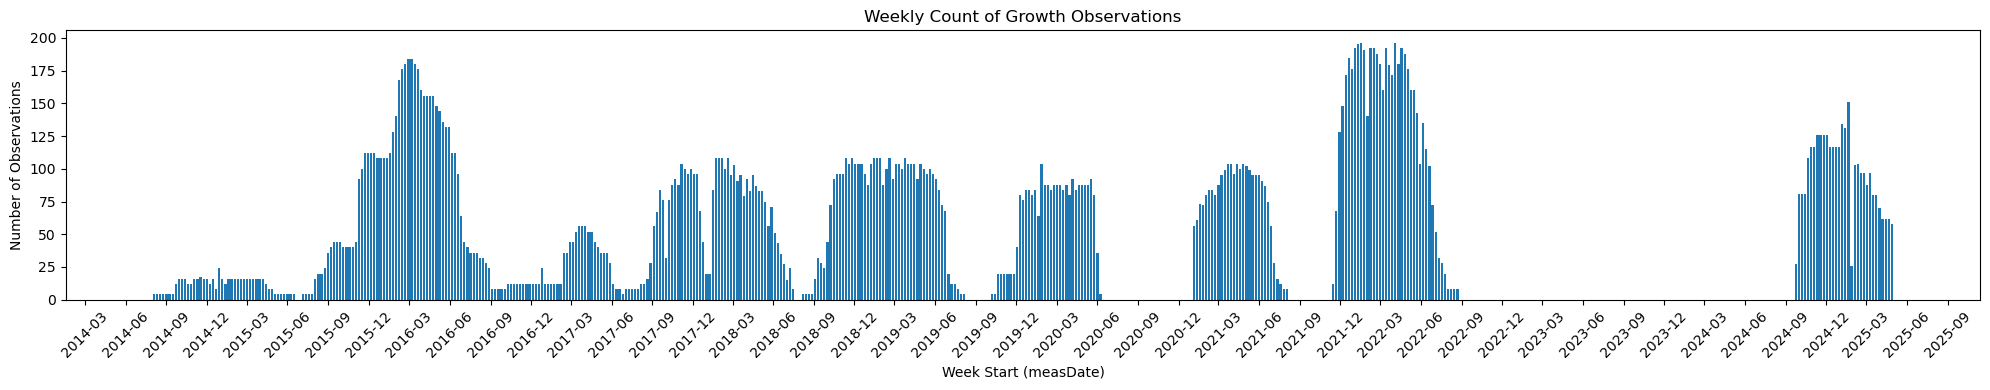

In [143]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df["week_start"] = df["measDate"].dt.to_period("W").apply(lambda r: r.start_time)
weekly_counts = df.groupby("week_start").size().reset_index(name="count")
plt.figure(figsize=(20, 4))
plt.bar(weekly_counts["week_start"], weekly_counts["count"], width=5)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Weekly Count of Growth Observations")
plt.xlabel("Week Start (measDate)")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


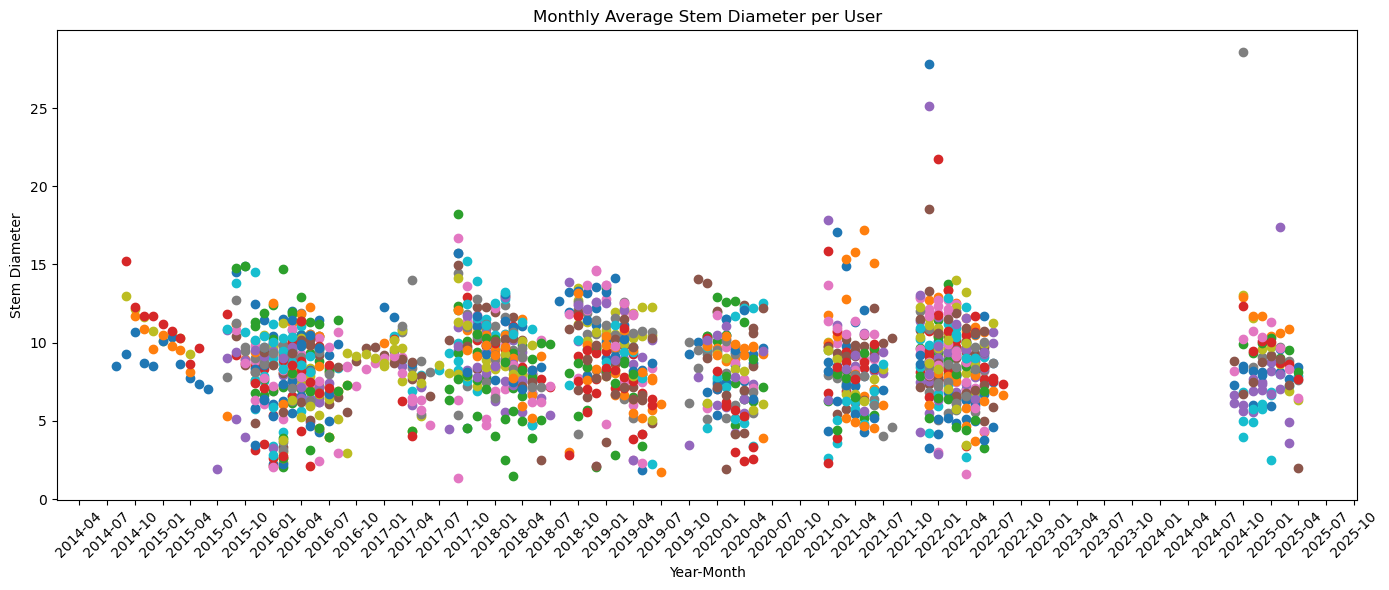

In [ ]:
df = df.dropna(subset=["stemDiameter", "measDate"])
df["year_month"] = df["measDate"].dt.to_period("M").astype(str)

pivot = df.groupby(["userId", "year_month"])["stemDiameter"].mean().reset_index()
pivot = pivot[(pivot["stemDiameter"] >= 1) & (pivot["stemDiameter"] <= 30)] # 1~30 mm 로 토마토 직경 최대 길이 제한 설정
pivot["year_month_dt"] = pd.to_datetime(pivot["year_month"], format="%Y-%m")

plt.figure(figsize=(14, 6))
for user_id in pivot["userId"].unique():
    subset = pivot[pivot["userId"] == user_id]
    plt.scatter(subset["year_month_dt"], subset["stemDiameter"], label=user_id)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Monthly Average Stem Diameter per User")
plt.xlabel("Year-Month")
plt.ylabel("Stem Diameter")
plt.xticks(rotation=45)
#plt.legend(title="User ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

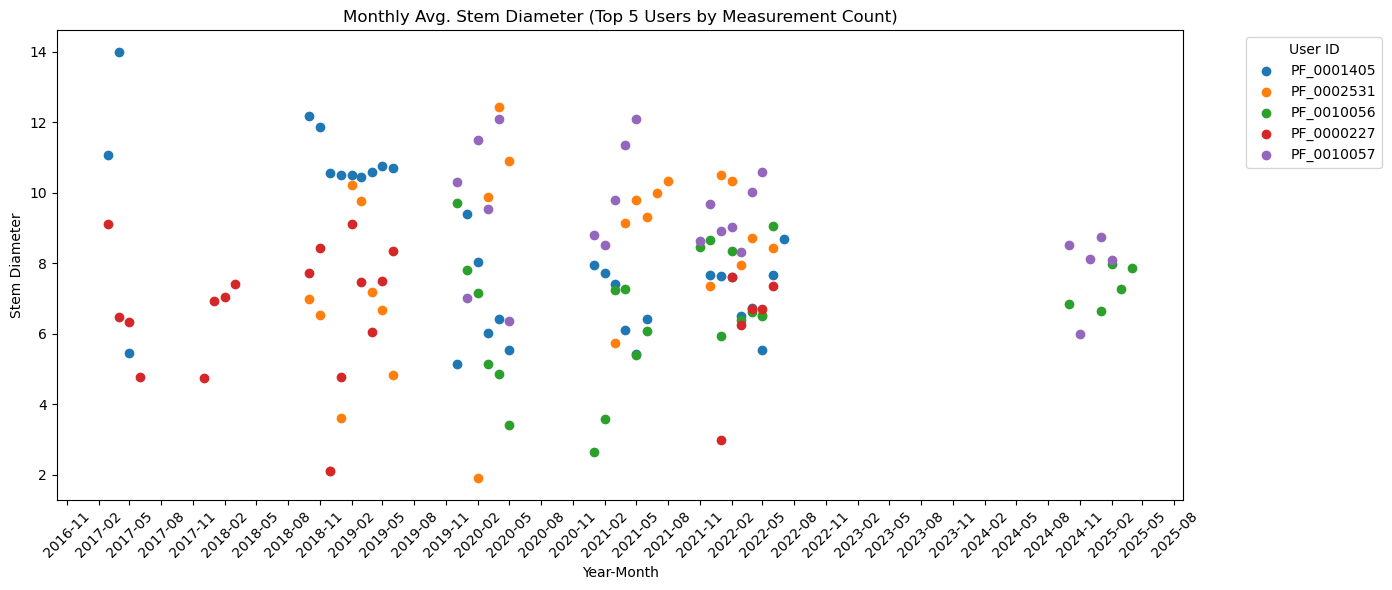

In [ ]:
top_users = (
    pivot["userId"]
    .value_counts()
    .head(5)
    .index
    .tolist()
) # 측정수 상위 5개 농가 줄기 직경 변화

plt.figure(figsize=(14, 6))

for user_id in top_users:
    subset = pivot[pivot["userId"] == user_id]
    plt.scatter(subset["year_month_dt"], subset["stemDiameter"], label=user_id)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Monthly Avg. Stem Diameter (Top 5 Users by Measurement Count)")
plt.xlabel("Year-Month")
plt.ylabel("Stem Diameter")
plt.xticks(rotation=45)
plt.legend(title="User ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()